In [1]:
import pandas as pd
import numpy as np
import unidecode
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [3]:
url_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
url_possession = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
url_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'

In [4]:
data_passing = pd.read_html(url_passing, header=1)[0]
data_passing = data_passing[data_passing['Player'] != 'Player']
data_passing

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp,...,Cmp%.3,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,825,...,44.7,1,0.9,+0.1,13,39,29,7,79,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,921,...,64.4,0,0.2,-0.2,6,57,4,0,58,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1322,...,85.0,0,0.9,-0.9,10,61,5,0,56,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,944,...,67.0,2,2.0,0.0,17,89,15,6,88,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,2,...,NaN,0,0.0,0.0,0,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2786,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,769,...,71.9,1,0.4,+0.6,9,67,7,1,61,Matches
2897,2787,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,537,...,68.2,1,1.2,-0.2,18,42,16,2,53,Matches
2898,2788,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,822,...,66.2,3,4.2,-1.2,44,53,43,2,103,Matches
2899,2789,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,236,...,80.0,2,1.4,+0.6,11,16,1,0,17,Matches


In [5]:
data_possession = pd.read_html(url_possession, header=1)[0]
data_possession = data_possession[data_possession['Player'] != 'Player']
data_possession

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,...,Prog,1/3,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,1417,...,127,40,10,19,24,866,782,90.3,32,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,1360,...,68,19,0,11,9,881,862,97.8,9,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,1646,...,58,15,4,17,36,1392,1290,92.7,43,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,1435,...,73,25,2,19,37,1062,998,94.0,44,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,12,...,0,1,0,4,0,12,8,66.7,2,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2786,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,1073,...,66,19,0,14,7,754,731,96.9,17,Matches
2897,2787,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,948,...,128,50,4,33,43,732,624,85.2,65,Matches
2898,2788,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,1141,...,118,40,6,28,30,967,844,87.3,78,Matches
2899,2789,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,530,...,11,3,4,33,16,699,429,61.4,66,Matches


In [6]:
data_defence = pd.read_html(url_defence, header=1)[0]
data_defence = data_defence[data_defence['Player'] != 'Player']
data_defence

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,22-062,2000,24.7,57,...,28,71,15,0,56,41,98,55,0,Matches
1,2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,34-160,1987,23.1,38,...,18,46,18,1,28,77,115,76,0,Matches
2,3,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21-346,2000,22.9,45,...,87,23,1,0,22,41,86,14,0,Matches
3,4,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,29-034,1993,23.2,80,...,80,37,1,0,36,62,142,11,0,Matches
4,5,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21-329,2000,0.5,0,...,3,1,0,0,1,0,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,2786,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,23-033,1999,18.3,41,...,35,24,9,0,15,31,72,39,0,Matches
2897,2787,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,24-163,1997,17.6,45,...,85,32,5,0,27,38,83,22,2,Matches
2898,2788,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,23-080,1998,18.3,26,...,127,11,1,0,10,11,37,8,1,Matches
2899,2789,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31-289,1990,14.8,4,...,69,5,3,0,2,2,6,22,0,Matches


In [7]:
d1 = data_passing[['Player', 'Pos', '90s', 'Prog', 'KP', 'PPA', 'CrsPA']]
d2 = data_possession[['Player', 'Touches', 'Prog', 'Succ']]
d3 = data_defence[['Player', 'TklW', 'Succ', 'Blocks', 'Int', 'Clr']]
d = pd.DataFrame(columns=['Player', '90s', 'Touches', 'Prog Passes', 'Key Passes', 'PPA', 'CrsPA', 'DribblesS', 'Prog Carries', 'TklW', 'PressureS', 'Blocks', 'Int', 'Clr'])
d['Player'] = d1['Player']
d['90s'] = d1['90s']
d['Touches'] = d2['Touches']
d['Prog Passes'] = d1['Prog']
d['Key Passes'] = d1['KP']
d['PPA'] = d1['PPA']
d['CrsPA'] = d1['CrsPA']
d['DribblesS'] = d2['Succ']
d['Prog Carries'] = d2['Prog']
d['TklW'] = d3['TklW']
d['PressureS'] = d3['Succ']
d['Blocks'] = d3['Blocks']
d['Int'] = d3['Int']
d['Clr'] = d3['Clr']
d.iloc[:, 1:] = d.iloc[:, 1:].astype(float)
d

,Player,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr
0,Max Aarons,24.7,1417.0,79.0,13.0,29.0,7.0,27.0,127.0,33.0,83.0,71.0,41.0,55.0
1,Yunis Abdelhamid,23.1,1360.0,58.0,6.0,4.0,0.0,12.0,68.0,29.0,115.0,46.0,77.0,76.0
2,Salis Abdul Samed,22.9,1646.0,56.0,10.0,5.0,0.0,24.0,58.0,29.0,161.0,23.0,41.0,14.0
3,Laurent Abergel,23.2,1435.0,88.0,17.0,15.0,6.0,34.0,73.0,48.0,188.0,37.0,62.0,11.0
4,Charles Abi,0.5,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,Martín Zubimendi,18.3,1073.0,61.0,9.0,7.0,1.0,5.0,66.0,19.0,85.0,24.0,31.0,39.0
2897,Szymon Żurkowski,17.6,948.0,53.0,18.0,16.0,2.0,22.0,128.0,30.0,89.0,32.0,38.0,22.0
2898,Martin Ødegaard,18.3,1141.0,103.0,44.0,43.0,2.0,13.0,118.0,15.0,97.0,11.0,11.0,8.0
2899,Milan Đurić,14.8,530.0,17.0,11.0,1.0,0.0,8.0,11.0,3.0,31.0,5.0,2.0,22.0


In [8]:
player_position = pd.read_excel('Player Positions-FBRef format.xlsx')
player_position.drop_duplicates(inplace=True)
set(player_position['Position'])

{'Attacking Midfield',
 'Central Midfield',
 'Centre-Back',
 'Centre-Forward',
 'Defender',
 'Defensive Midfield',
 'Goalkeeper',
 'Left Midfield',
 'Left Winger',
 'Left-Back',
 'Right Midfield',
 'Right Winger',
 'Right-Back',
 'Second Striker',
 'attack',
 'midfield'}

In [9]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Defensive Midfield', 'Central Midfield']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
1,7,Laurent Abergel,Defensive Midfield,23.2,1435.0,88.0,17.0,15.0,6.0,34.0,73.0,48.0,188.0,37.0,62.0,11.0,233.0,346.0,10.043103,14.913793
9,19,Tyler Adams,Defensive Midfield,12.0,872.0,46.0,7.0,8.0,0.0,5.0,65.0,13.0,83.0,25.0,20.0,17.0,131.0,158.0,10.916667,13.166667
13,27,Lucien Agoume,Defensive Midfield,16.5,936.0,57.0,10.0,9.0,0.0,17.0,44.0,32.0,86.0,28.0,47.0,27.0,137.0,220.0,8.30303,13.333333
19,37,Jean-Eudes Aholou,Defensive Midfield,6.5,327.0,14.0,4.0,4.0,1.0,5.0,24.0,6.0,23.0,5.0,13.0,10.0,52.0,57.0,8.0,8.769231
35,56,Luis Alberto,Central Midfield,19.0,1585.0,125.0,45.0,37.0,4.0,20.0,142.0,15.0,77.0,17.0,20.0,6.0,373.0,135.0,19.631579,7.105263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2795,Andre-Frank Zambo Anguissa,Defensive Midfield,13.4,983.0,67.0,15.0,13.0,1.0,21.0,76.0,22.0,89.0,18.0,26.0,20.0,193.0,175.0,14.402985,13.059701
1967,2801,Oier Zarraga,Central Midfield,10.3,506.0,50.0,5.0,8.0,0.0,6.0,42.0,6.0,35.0,17.0,15.0,6.0,111.0,79.0,10.776699,7.669903
1975,2810,Piotr Zieliński,Central Midfield,19.3,1151.0,81.0,45.0,37.0,7.0,19.0,102.0,11.0,77.0,24.0,12.0,3.0,291.0,127.0,15.07772,6.580311
1980,2818,Igor Zubeldia,Defensive Midfield,10.8,700.0,16.0,0.0,1.0,0.0,2.0,20.0,10.0,26.0,14.0,16.0,42.0,39.0,108.0,3.611111,10.0


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

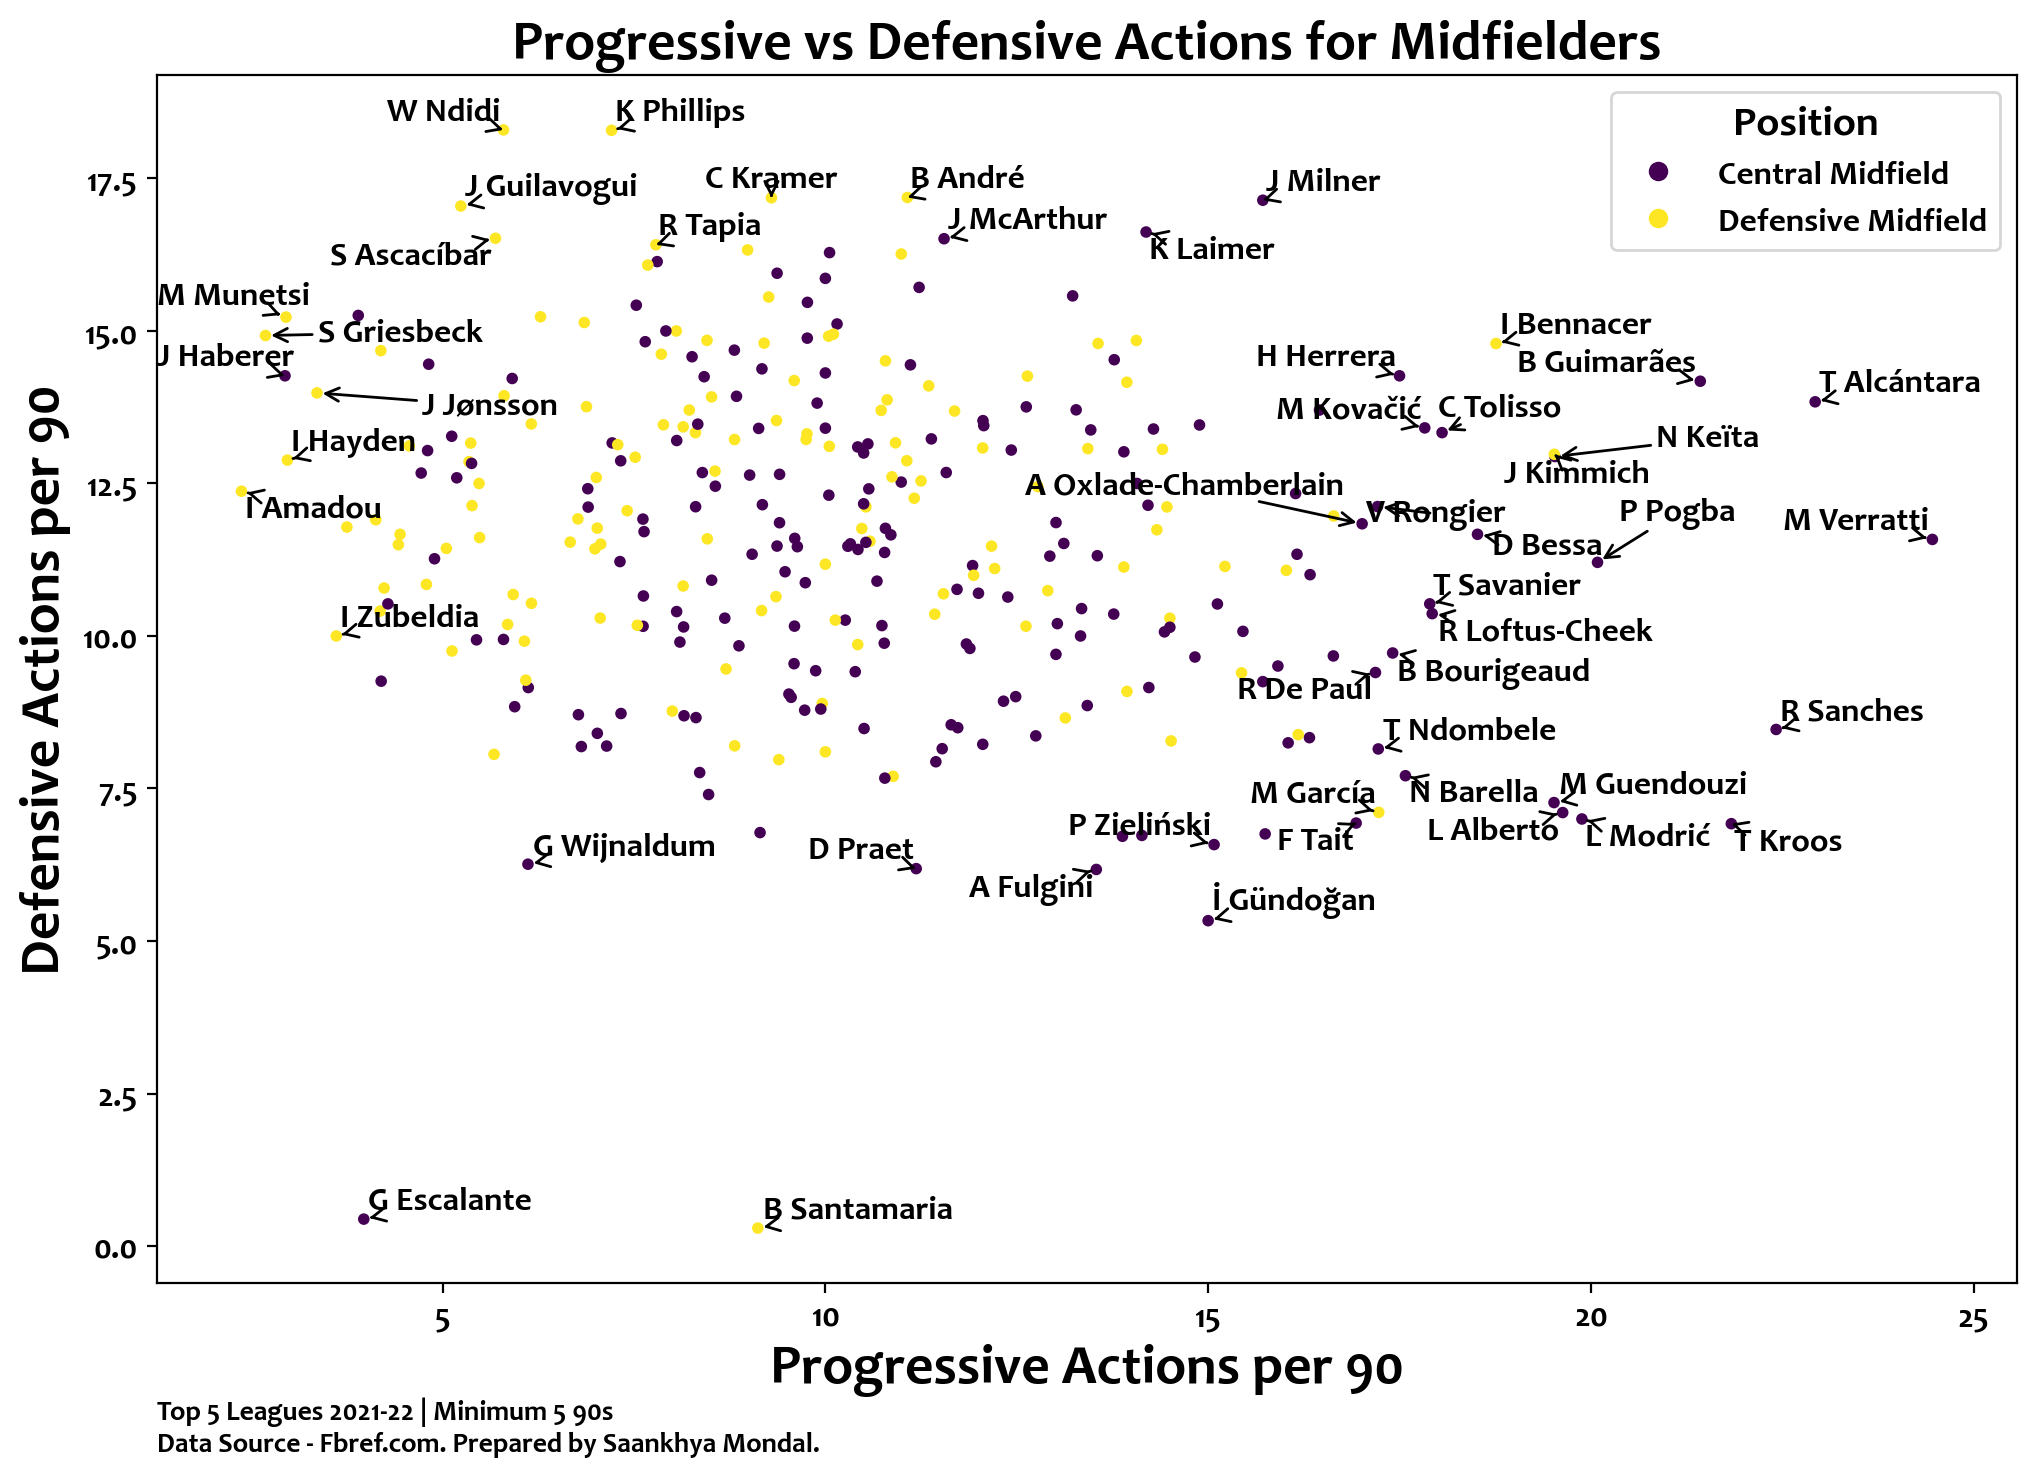

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.97)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.92)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Midfielders', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=['Central Midfield', 'Defensive Midfield'], title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [11]:
fig.savefig('Images/PAp90vDAp90_CM_DM.png', dpi=400, bbox_inches='tight')

In [12]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Left-Back', 'Right-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
7,17,Marcos Acuña,Left-Back,18.4,1605.0,88.0,36.0,35.0,20.0,37.0,109.0,27.0,68.0,24.0,22.0,26.0,325.0,167.0,17.663043,9.076087
12,26,Martin Agirregabiria,Right-Back,16.2,890.0,51.0,13.0,18.0,10.0,14.0,43.0,19.0,53.0,27.0,23.0,41.0,149.0,163.0,9.197531,10.061728
17,32,Ruben Aguilar,Right-Back,15.1,1362.0,89.0,8.0,20.0,6.0,6.0,103.0,36.0,90.0,22.0,38.0,49.0,232.0,235.0,15.364238,15.562914
21,39,Ola Aina,Right-Back,11.8,719.0,49.0,13.0,18.0,5.0,14.0,61.0,12.0,46.0,20.0,27.0,24.0,160.0,129.0,13.559322,10.932203
22,41,Rayan Aït Nouri,Left-Back,13.3,849.0,24.0,12.0,9.0,5.0,26.0,77.0,30.0,94.0,25.0,26.0,23.0,153.0,198.0,11.503759,14.887218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,2793,Joseba Zaldúa,Right-Back,9.4,563.0,25.0,4.0,10.0,3.0,4.0,24.0,14.0,26.0,20.0,10.0,28.0,70.0,98.0,7.446809,10.425532
1965,2799,Gabriele Zappa,Right-Back,11.3,675.0,30.0,7.0,6.0,5.0,5.0,38.0,8.0,50.0,23.0,24.0,14.0,91.0,119.0,8.053097,10.530973
1966,2800,Davide Zappacosta,Right-Back,17.1,1124.0,56.0,20.0,23.0,11.0,8.0,98.0,7.0,61.0,38.0,12.0,14.0,216.0,132.0,12.631579,7.719298
1969,2803,Deyovaisio Zeefuik,Right-Back,6.3,339.0,20.0,4.0,5.0,1.0,2.0,23.0,7.0,28.0,17.0,12.0,17.0,55.0,81.0,8.730159,12.857143


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

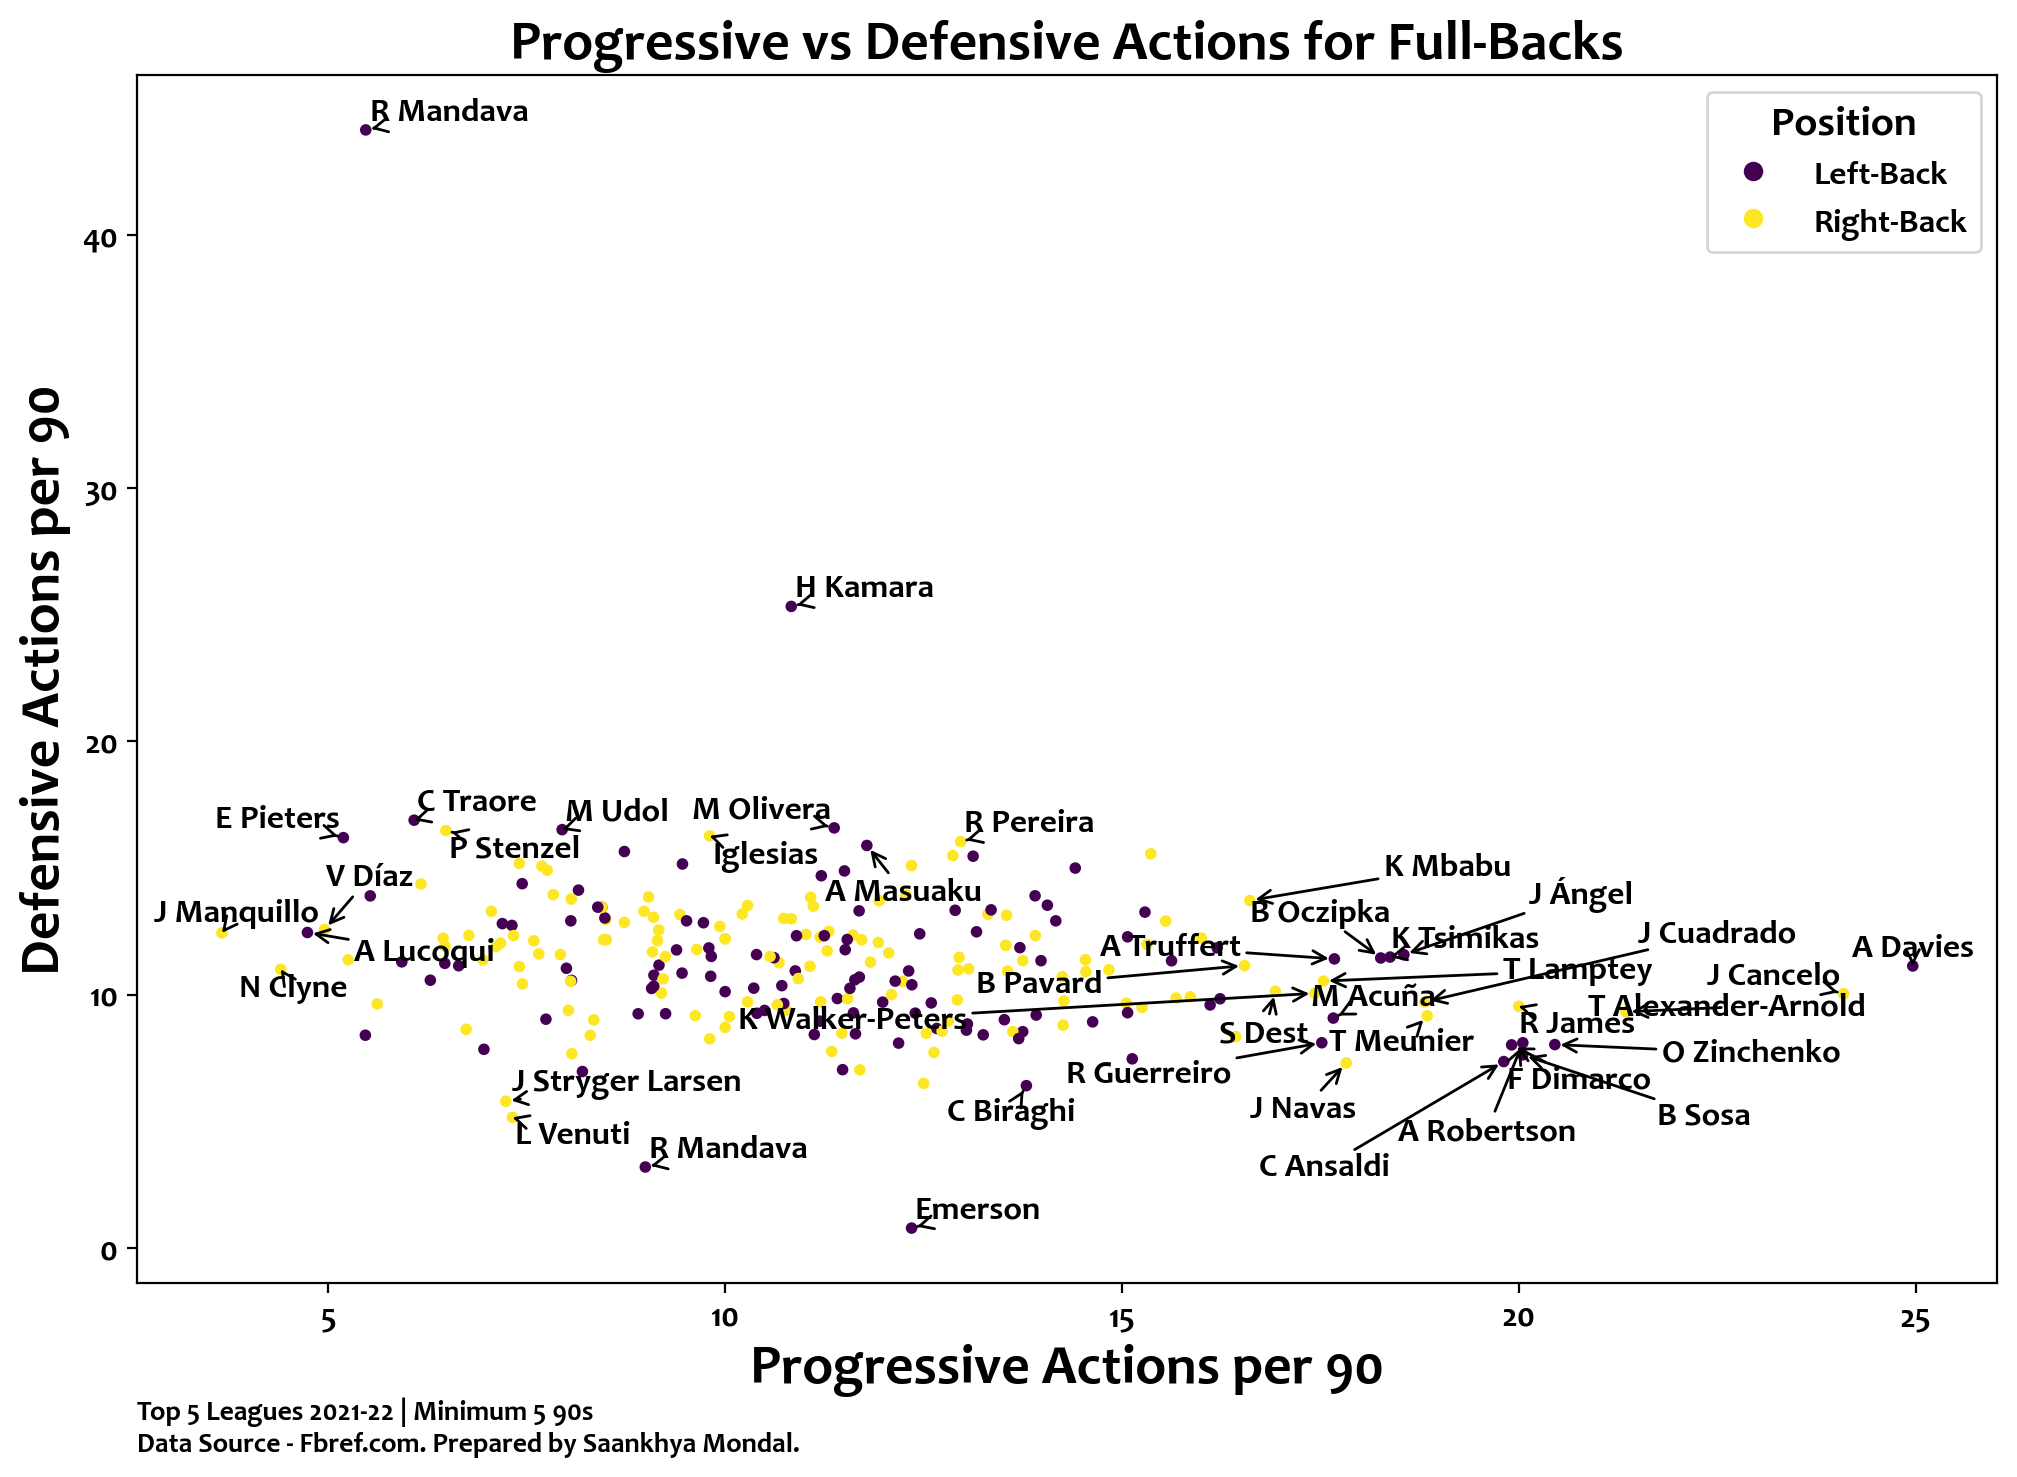

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
col_codes = data.Position.astype('category').cat.codes
scatter = plt.scatter(par_x, par_y, c=col_codes, s=10)

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='black'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Full-Backs', fontsize=20, fontdict={'weight':'heavy'})
ax.legend(handles=scatter.legend_elements()[0], labels=who, title="Position")
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [14]:
fig.savefig('Images/PAp90vDAp90_FB.png', dpi=400, bbox_inches='tight')

In [15]:
data = pd.merge(player_position, d, on="Player")
data.drop_duplicates(inplace=True)
data['Progressive Actions'] = data['Prog Passes'] + data['DribblesS'] + data['Prog Carries'] + data['Key Passes'] + data['PPA'] + data['CrsPA']
data['Defensive Actions'] = data['TklW'] + data['PressureS'] + data['Blocks'] + data['Int'] + data['Clr']
data = data[data['90s']>=5.0]
data['PAp90'] = data['Progressive Actions']/data['90s']
data['DAp90'] = data['Defensive Actions']/data['90s']
who = ['Centre-Back']
data = data[data['Position'].apply(lambda x: x in who)]
data

,S. No.,Player,Position,90s,Touches,Prog Passes,Key Passes,PPA,CrsPA,DribblesS,Prog Carries,TklW,PressureS,Blocks,Int,Clr,Progressive Actions,Defensive Actions,PAp90,DAp90
0,4,Yunis Abdelhamid,Centre-Back,23.1,1360.0,58.0,6.0,4.0,0.0,12.0,68.0,29.0,115.0,46.0,77.0,76.0,148.0,343.0,6.406926,14.848485
5,15,Francesco Acerbi,Centre-Back,18.2,1480.0,67.0,4.0,4.0,0.0,1.0,64.0,8.0,28.0,35.0,36.0,85.0,140.0,192.0,7.692308,10.549451
15,30,Nayef Aguerd,Centre-Back,22.9,1845.0,59.0,2.0,2.0,0.0,5.0,56.0,10.0,51.0,23.0,41.0,118.0,124.0,243.0,5.414847,10.611354
20,38,Joseph Aidoo,Centre-Back,18.3,1119.0,58.0,2.0,3.0,0.0,4.0,64.0,23.0,81.0,34.0,33.0,79.0,131.0,250.0,7.15847,13.661202
24,44,Manuel Akanji,Centre-Back,17.4,1481.0,88.0,2.0,3.0,0.0,5.0,83.0,27.0,82.0,24.0,35.0,50.0,181.0,218.0,10.402299,12.528736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,2736,Adam Webster,Centre-Back,13.0,1125.0,59.0,1.0,1.0,0.0,7.0,71.0,9.0,34.0,28.0,24.0,60.0,139.0,155.0,10.692308,11.923077
1927,2745,Ben White,Centre-Back,23.0,1435.0,62.0,8.0,3.0,0.0,6.0,71.0,17.0,57.0,40.0,51.0,74.0,150.0,239.0,6.521739,10.391304
1952,2781,Maya Yoshida,Centre-Back,17.8,995.0,37.0,5.0,4.0,1.0,3.0,23.0,11.0,41.0,29.0,44.0,72.0,73.0,197.0,4.101124,11.067416
1957,2787,Dan-Axel Zagadou,Centre-Back,5.2,510.0,16.0,0.0,0.0,0.0,3.0,20.0,5.0,23.0,10.0,12.0,20.0,39.0,70.0,7.5,13.461538


Text(0.125, 0.02, 'Data Source - Fbref.com. Prepared by Saankhya Mondal.')

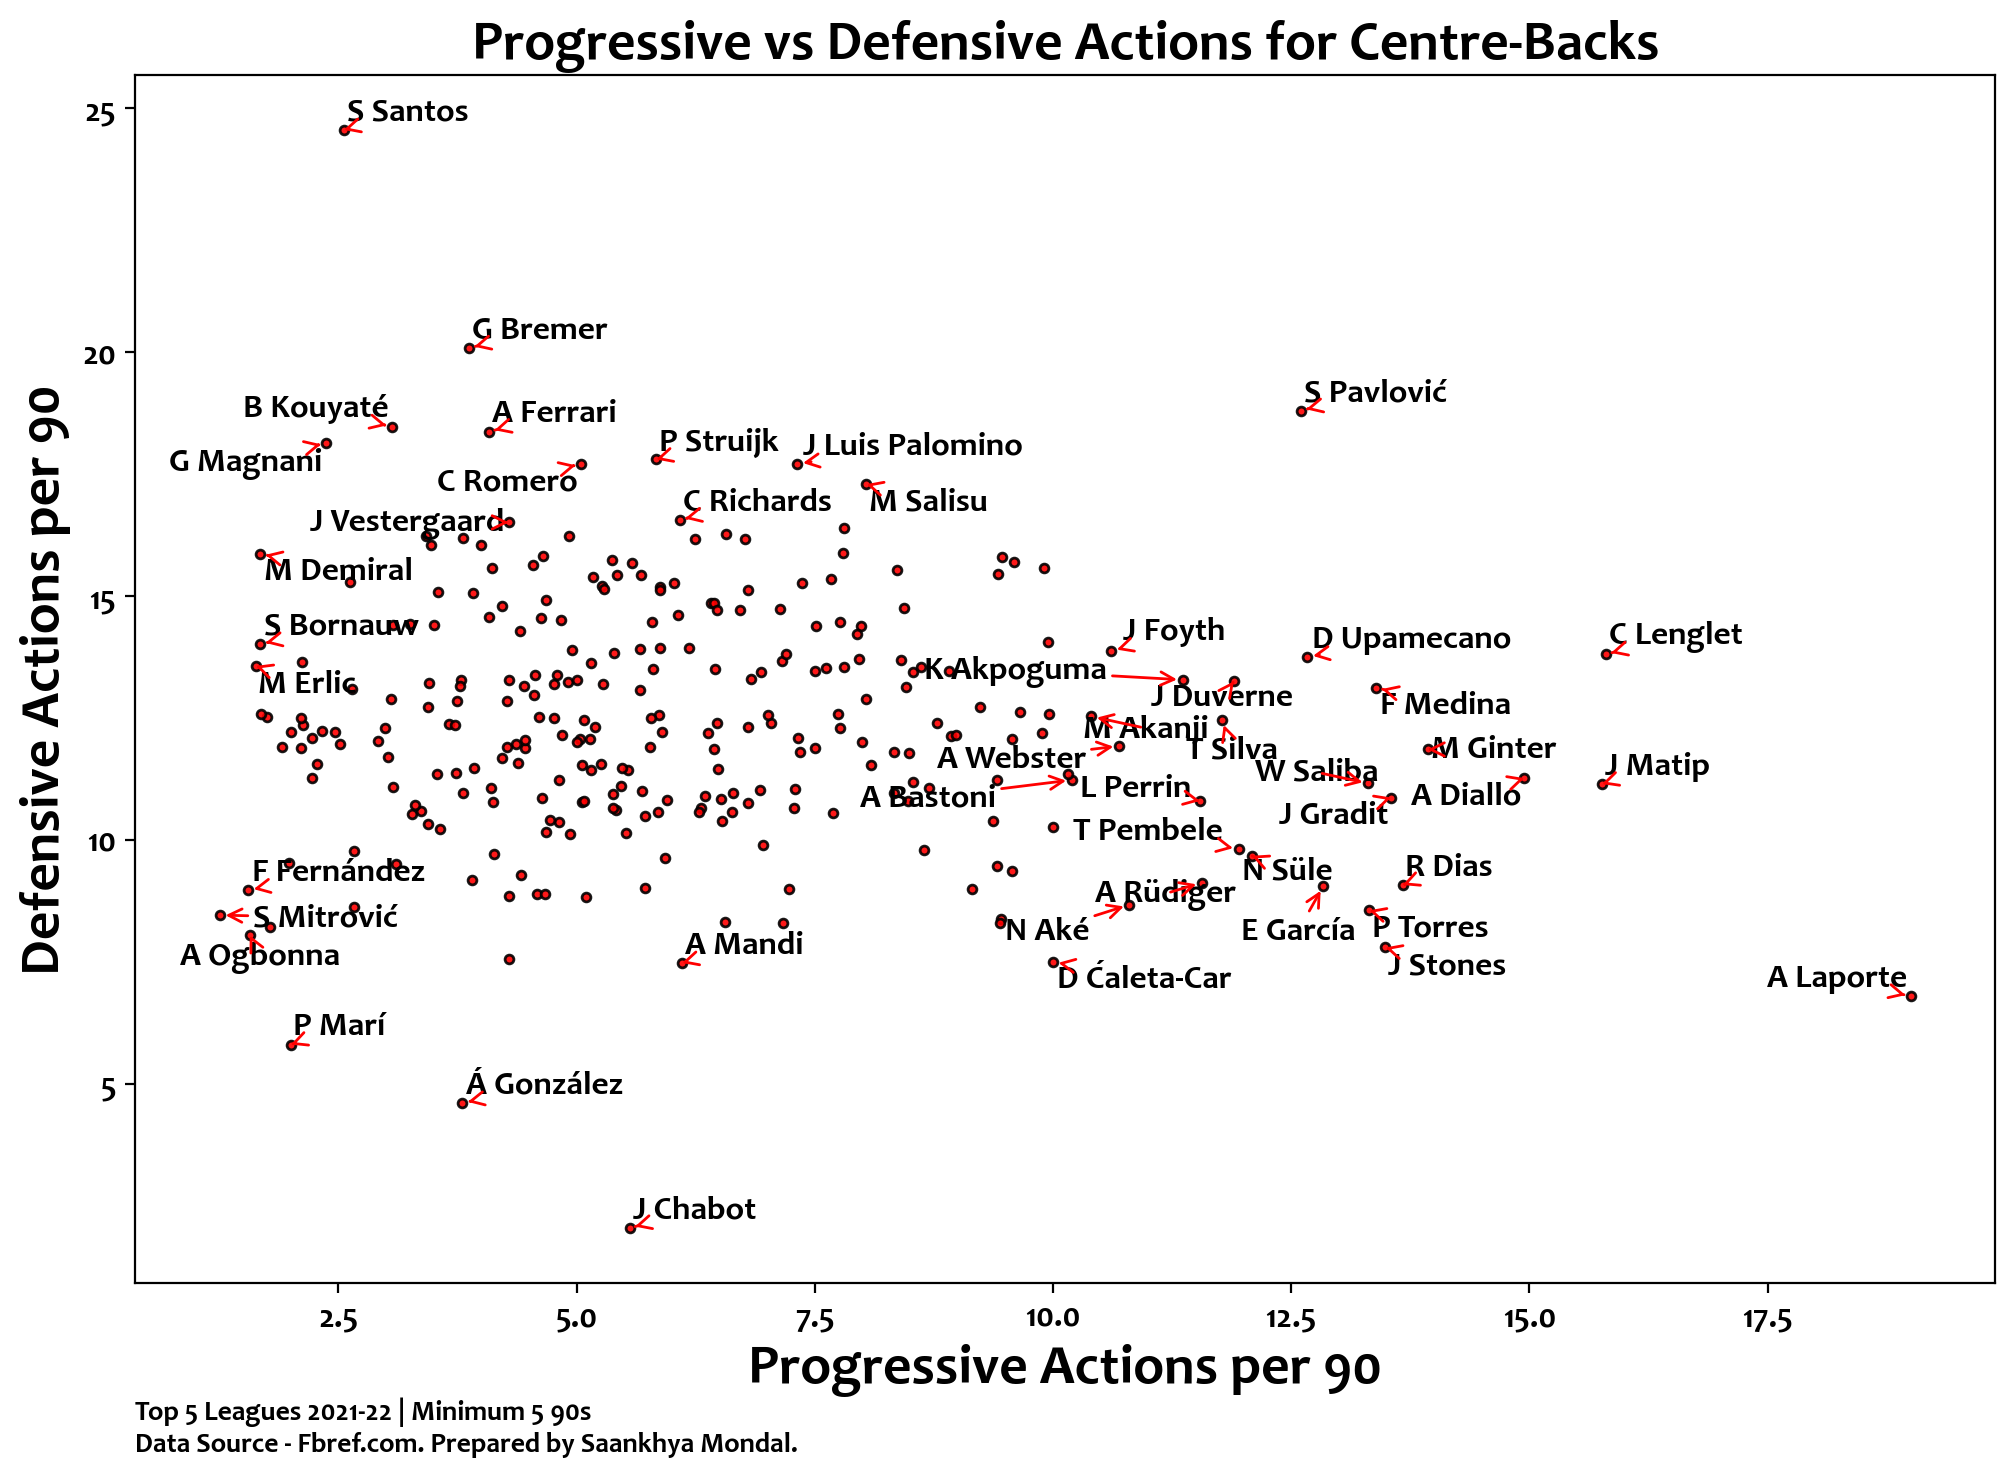

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
par_x = list(data['PAp90'])
par_y = list(data['DAp90'])
scatter = plt.scatter(par_x, par_y, s=10, alpha=0.9, c='red', edgecolors='black')

outlier_top = data['DAp90'].astype(float).quantile(0.96)
outlier_bottom = data['DAp90'].astype(float).quantile(0.02)
outlier_right = data['PAp90'].astype(float).quantile(0.91)
outlier_left = data['PAp90'].astype(float).quantile(0.02)

txts = []
for i, txt in enumerate(list(data['Player'])):
    if par_x[i]>outlier_right or par_y[i]>outlier_top or par_x[i]<outlier_left or par_y[i]<outlier_bottom:
        if len(txt.split()) != 1:
            name = txt[0] + ' ' + ' '.join(txt.split()[1:])
        else:
            name = txt
        txts.append(plt.text(par_x[i], par_y[i], name))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='red'))
ax.set_xlabel('Progressive Actions per 90', fontsize=20)
ax.set_ylabel('Defensive Actions per 90', fontsize=20)
ax.set_title('Progressive vs Defensive Actions for Centre-Backs', fontsize=20, fontdict={'weight':'heavy'})
fig.text(0.125,0.04,'Top 5 Leagues 2021-22 | Minimum 5 90s', size = 10)
fig.text(0.125,0.02,'Data Source - Fbref.com. Prepared by Saankhya Mondal.', size=10)

In [17]:
fig.savefig('Images/PAp90vDAp90_CB.png', dpi=400, bbox_inches='tight')